In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
df=pd.read_csv('gender_submission.csv')

### Header_Data

In [3]:
headers_data = ["PassengerId", "Survived"]
data = [[1, 0]]
df = pd.DataFrame(columns=headers_data)

In [4]:
df = pd.read_csv('gender_submission.csv',names=headers_data)
df.head(10)

,PassengerId,Survived
0,PassengerId,Survived
1,892,0
2,893,1
3,894,0
4,895,0
5,896,1
6,897,0
7,898,1
8,899,0
9,900,1


In [5]:
df.tail(10)

,PassengerId,Survived
409,1300,1
410,1301,1
411,1302,1
412,1303,1
413,1304,1
414,1305,0
415,1306,1
416,1307,0
417,1308,0
418,1309,0


In [6]:
df.shape

(419, 2)

In [7]:
print("Number of Rows:", df.shape[0])
print("Number of Columns:", df.shape[1])

Number of Rows: 419
Number of Columns: 2


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 419 entries, 0 to 418
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  419 non-null    object
 1   Survived     419 non-null    object
dtypes: object(2)
memory usage: 6.7+ KB


In [9]:
pd.options.display.float_format ='{:.2f}'.format

In [10]:
df.describe()

,PassengerId,Survived
count,419,419
unique,419,3
top,1309,0
freq,1,266


In [11]:
df.describe(include='all')   

,PassengerId,Survived
count,419,419
unique,419,3
top,1309,0
freq,1,266


In [12]:
print(" Any missing values ?",df.isnull().values.any())

 Any missing values ? False


In [13]:
df.isnull()

,PassengerId,Survived
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
414,False,False
415,False,False
416,False,False
417,False,False


In [14]:
df.isnull().sum()

PassengerId    0
Survived       0
dtype: int64

In [15]:
df.dropna(axis=0,inplace=True)

<Axes: >

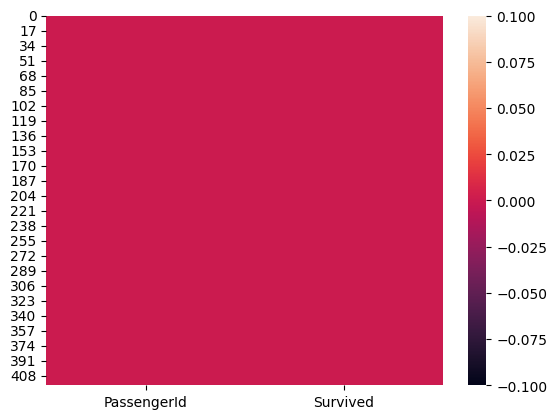

In [16]:
sns.heatmap(df.isnull())

In [17]:
print("lenght of data:",len(df))
per_missing=df.isnull().sum()*100/len(df)
print(per_missing)

lenght of data: 419
PassengerId   0.00
Survived      0.00
dtype: float64


In [18]:
df.dropna(axis=0)

,PassengerId,Survived
0,PassengerId,Survived
1,892,0
2,893,1
3,894,0
4,895,0
...,...,...
414,1305,0
415,1306,1
416,1307,0
417,1308,0


In [19]:
df.head()

,PassengerId,Survived
0,PassengerId,Survived
1,892,0
2,893,1
3,894,0
4,895,0


In [20]:
df.tail()

,PassengerId,Survived
414,1305,0
415,1306,1
416,1307,0
417,1308,0
418,1309,0


In [21]:
df.dtypes

PassengerId    object
Survived       object
dtype: object

In [22]:
dup_data=df.duplicated().any()

In [23]:
print("Are there any duplicate value?",dup_data)

Are there any duplicate value? False


In [24]:
df=df.drop_duplicates()
df

,PassengerId,Survived
0,PassengerId,Survived
1,892,0
2,893,1
3,894,0
4,895,0
...,...,...
414,1305,0
415,1306,1
416,1307,0
417,1308,0


In [25]:
df.columns

Index(['PassengerId', 'Survived'], dtype='object')

In [26]:
df.groupby('PassengerId')['Survived'].value_counts().unstack().fillna(0)

Survived,0,1,Survived
PassengerId,,,
1000,1.00,0.00,0.00
1001,1.00,0.00,0.00
1002,1.00,0.00,0.00
1003,0.00,1.00,0.00
1004,0.00,1.00,0.00
...,...,...,...
996,0.00,1.00,0.00
997,1.00,0.00,0.00
998,1.00,0.00,0.00


In [27]:
df['PassengerId'] = pd.to_numeric(df['PassengerId'], errors='coerce')  
df['Survived'] = df['Survived'].astype('category') 


In [28]:
print(df[['PassengerId', 'Survived']].head())


   PassengerId  Survived
0          NaN  Survived
1       892.00         0
2       893.00         1
3       894.00         0
4       895.00         0


In [29]:
print(df[['PassengerId', 'Survived']].isnull().sum())


PassengerId    1
Survived       0
dtype: int64


In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

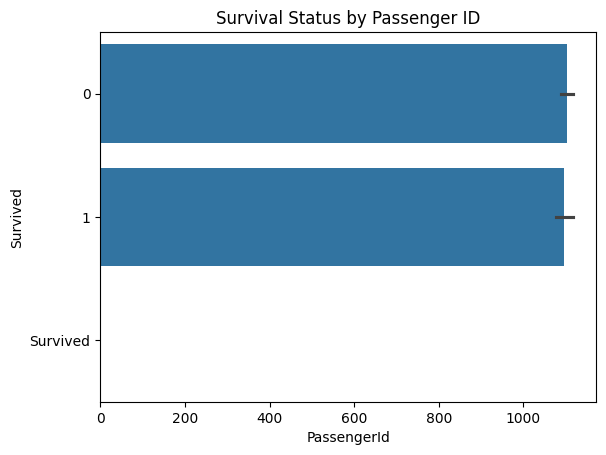

In [31]:
sns.barplot(x='PassengerId', y='Survived', data=df)
plt.title("Survival Status by Passenger ID")
plt.show()

### Count plot for survival

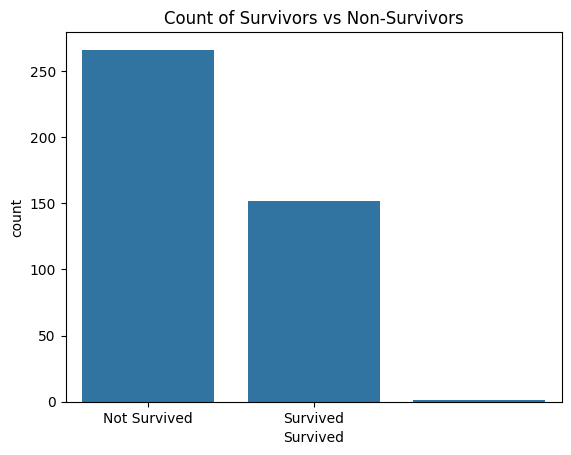

In [32]:

sns.countplot(x='Survived', data=df)
plt.title("Count of Survivors vs Non-Survivors")
plt.xlabel("Survived")
plt.xticks([0, 1], ['Not Survived', 'Survived'])
plt.show()


In [33]:
df.columns

Index(['PassengerId', 'Survived'], dtype='object')

In [34]:
df['Survived'].dtype

CategoricalDtype(categories=['0', '1', 'Survived'], ordered=False, categories_dtype=object)

In [35]:
df['Survived'] = pd.to_numeric(df['Survived'], errors='coerce')

### Pie chart for survival

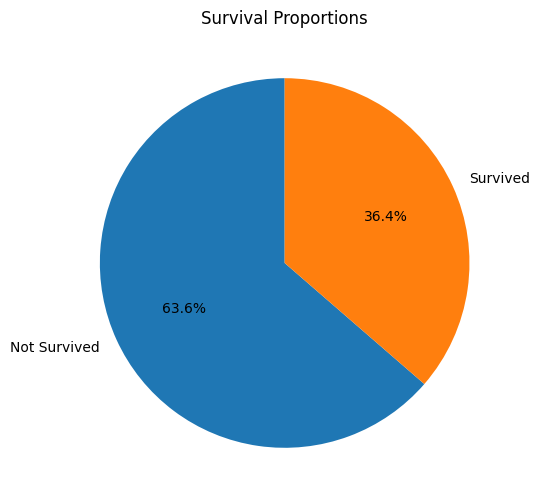

In [36]:
survival_counts = df['Survived'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(survival_counts, labels=['Not Survived', 'Survived'], autopct='%1.1f%%', startangle=90)
plt.title("Survival Proportions")
plt.show()


###  Bar plot for survival counts

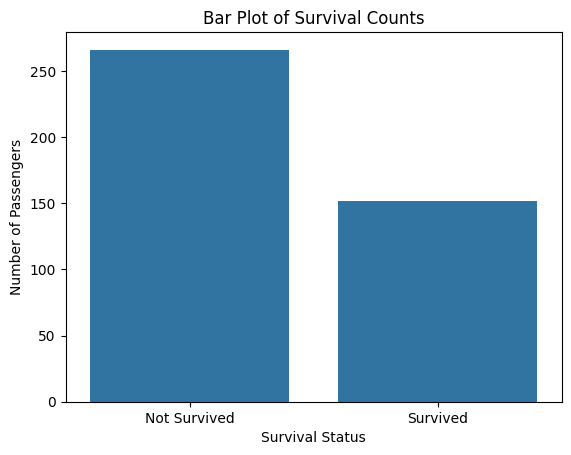

In [37]:
survival_counts = df['Survived'].value_counts()
sns.barplot(x=survival_counts.index, y=survival_counts.values)
plt.title("Bar Plot of Survival Counts")
plt.xlabel("Survival Status")
plt.xticks([0, 1], ['Not Survived', 'Survived'])
plt.ylabel("Number of Passengers")
plt.show()


### Count plot by PassengerId (not very informative in this context)

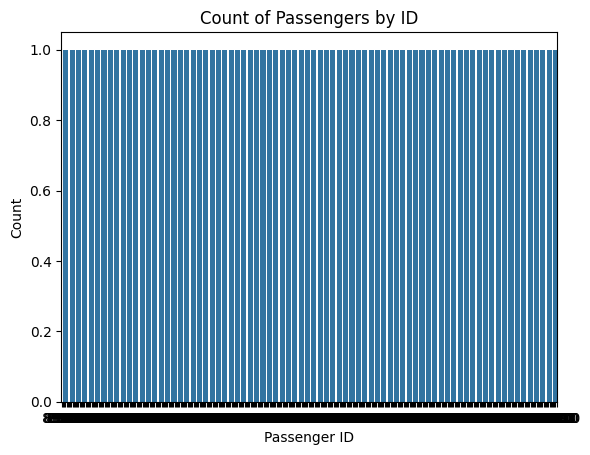

In [38]:
sns.countplot(x='PassengerId', data=df)
plt.title("Count of Passengers by ID")
plt.xlabel("Passenger ID")
plt.ylabel("Count")
plt.show()


### Histogram of Passenger IDs

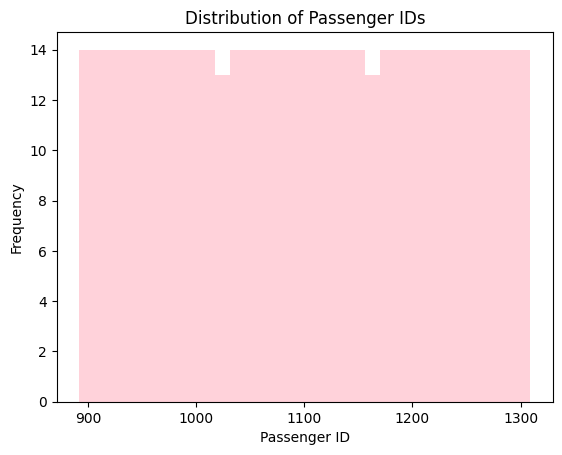

In [39]:
plt.hist(df['PassengerId'], bins=30, color='pink', alpha=0.7)
plt.title("Distribution of Passenger IDs")
plt.xlabel("Passenger ID")
plt.ylabel("Frequency")
plt.show()


### Swarm plot for survival

C:\Users\My Computer\AppData\Roaming\Python\Python312\site-packages\seaborn\categorical.py:3399: UserWarning: 80.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


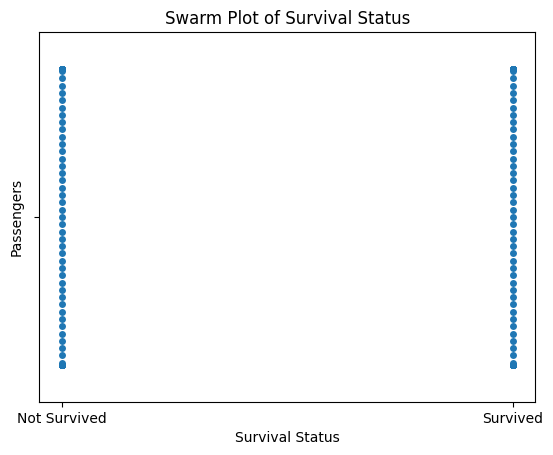

In [40]:
sns.swarmplot(x='Survived', data=df)
plt.title("Swarm Plot of Survival Status")
plt.xlabel("Survival Status")
plt.xticks([0, 1], ['Not Survived', 'Survived'])
plt.ylabel("Passengers")
plt.show()


### Strip plot for survival

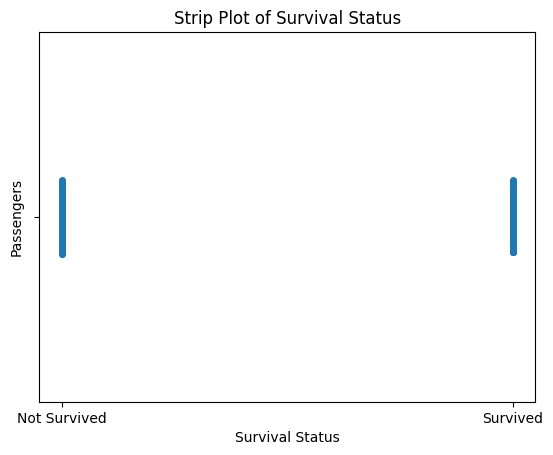

In [41]:
sns.stripplot(x='Survived', data=df, jitter=True)
plt.title("Strip Plot of Survival Status")
plt.xlabel("Survival Status")
plt.xticks([0, 1], ['Not Survived', 'Survived'])
plt.ylabel("Passengers")
plt.show()


### Pairplot of Key Features

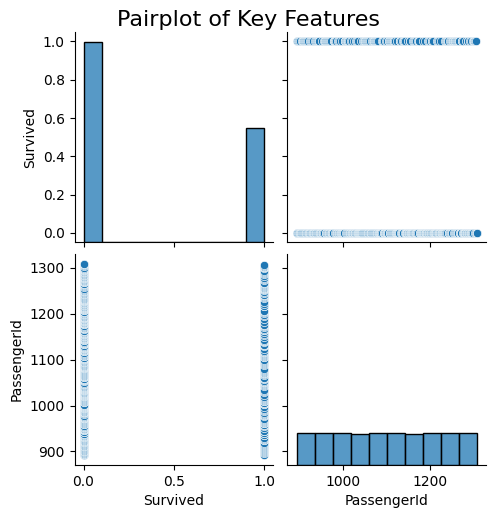

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(df[['Survived', 'PassengerId']])
plt.suptitle("Pairplot of Key Features", y=1.02, fontsize=16)
plt.show()

### Plot the histogram of 'Survived' 

   PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1


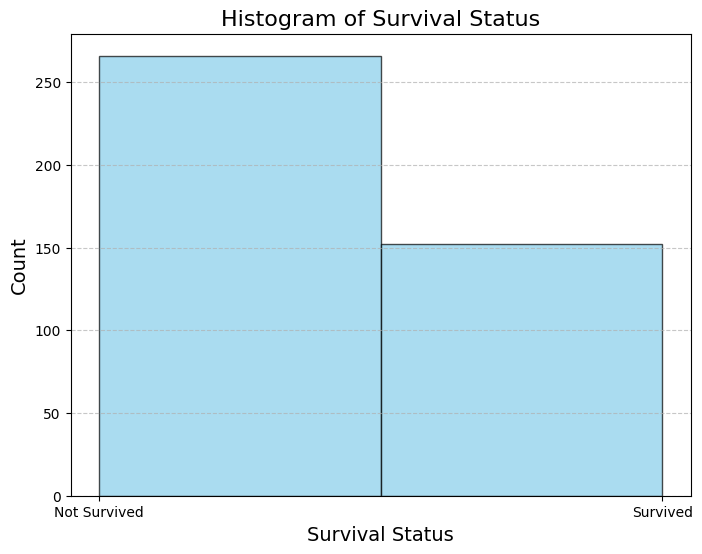

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
gender_submission = pd.read_csv("gender_submission.csv")
print(gender_submission.head())
plt.figure(figsize=(8, 6))
plt.hist(gender_submission['Survived'], bins=2, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Histogram of Survival Status', fontsize=16)
plt.xlabel('Survival Status', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks([0, 1], ['Not Survived', 'Survived'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Survival Rate

C:\Program Files\KMSpico\temp\ipykernel_19440\1465780040.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=df, palette=['#9b59b6', '#1abc9c'])


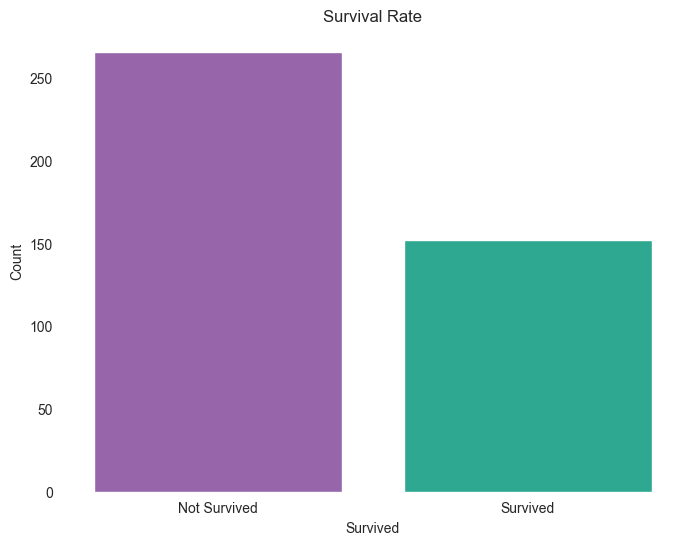

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.set_style("whitegrid")
sns.countplot(x='Survived', data=df, palette=['#9b59b6', '#1abc9c'])
plt.title('Survival Rate')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Survived', 'Survived'])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.grid(False)
plt.show()

### Passenger ID (histogram)

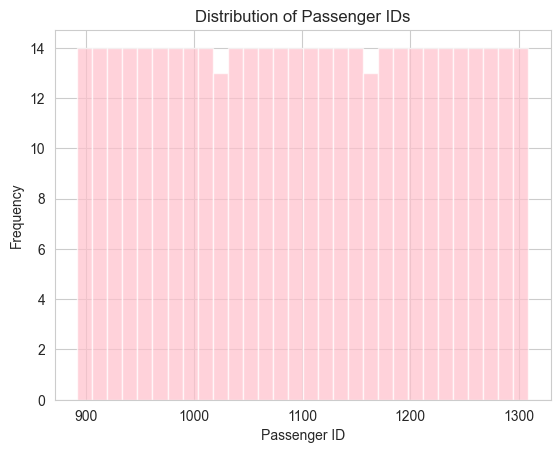

In [45]:
plt.hist(df['PassengerId'], bins=30, color='pink', alpha=0.7)
plt.title("Distribution of Passenger IDs")
plt.xlabel("Passenger ID")
plt.ylabel("Frequency")
plt.show()

In [46]:
print(survival_counts)


Survived
0.00    266
1.00    152
Name: count, dtype: int64


### survival Proportions

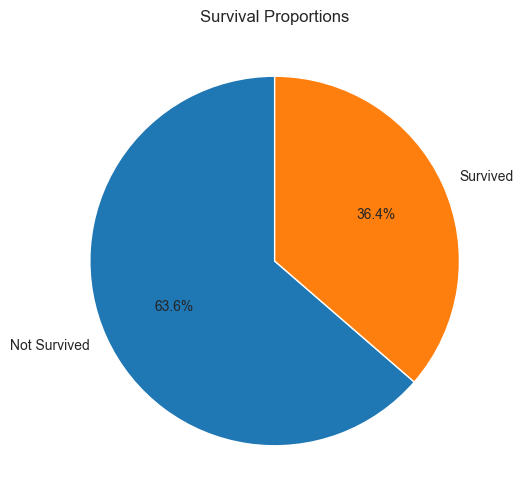

In [47]:
survival_counts = df['Survived'].value_counts()
if len(survival_counts) == 2:
    labels = ['Not Survived', 'Survived']
else:
    labels = survival_counts.index.tolist()
plt.figure(figsize=(6, 6))
plt.pie(survival_counts, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title("Survival Proportions")
plt.show()

### Passenger ID (bar chart)

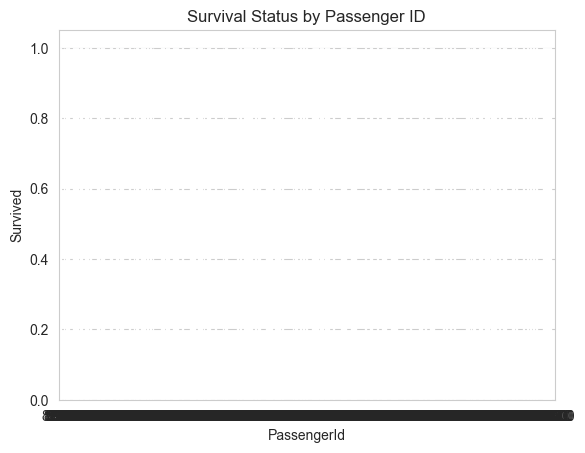

In [48]:
sns.barplot(x='PassengerId', y='Survived', data=df)
plt.title("Survival Status by Passenger ID")
plt.show()

###  Survival status (count plot)

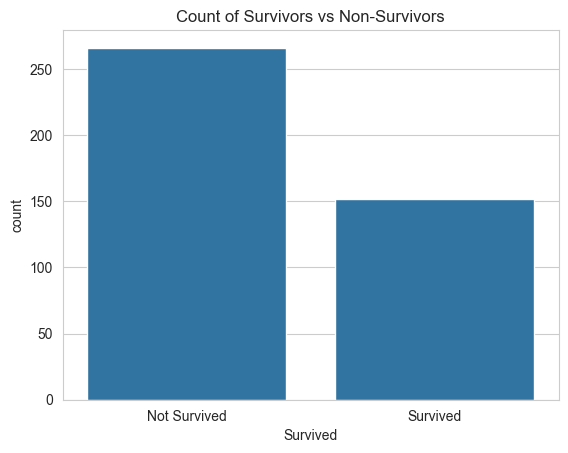

In [49]:
sns.countplot(x='Survived', data=df)
plt.title("Count of Survivors vs Non-Survivors")
plt.xlabel("Survived")
plt.xticks([0, 1], ['Not Survived', 'Survived'])
plt.show()

### Passenger ID (box plot)

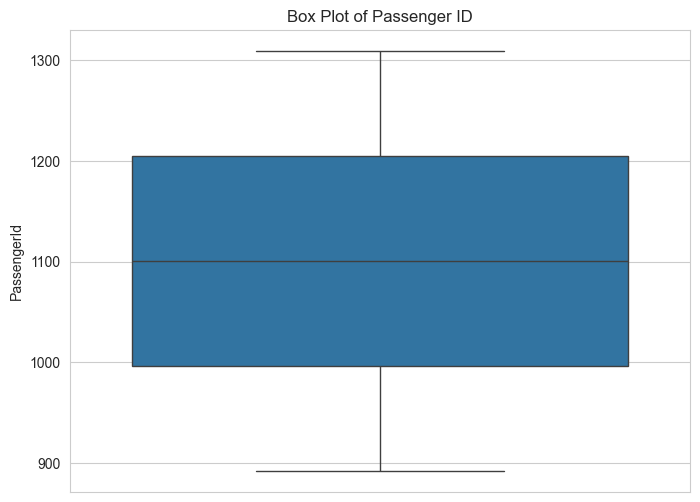

In [50]:
plt.figure(figsize=(8, 6))
sns.boxplot(df['PassengerId'])
plt.title("Box Plot of Passenger ID")
plt.show()

### Survival violin plot

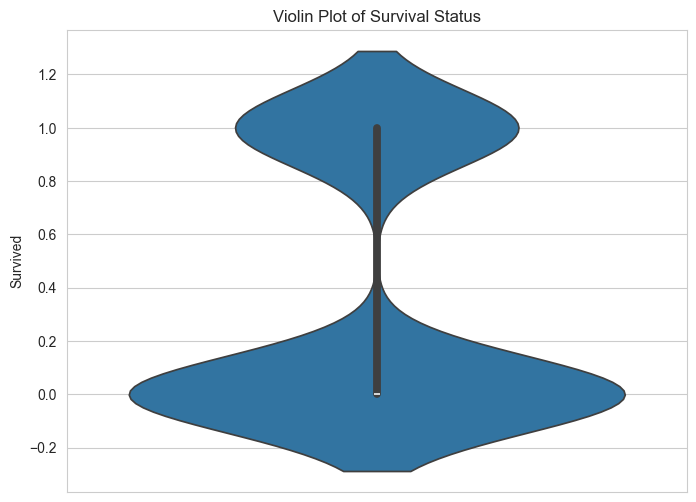

In [51]:

plt.figure(figsize=(8, 6))
sns.violinplot(df['Survived'])
plt.title("Violin Plot of Survival Status")
plt.show()

### Passenger ID or survival ( scatter plot )

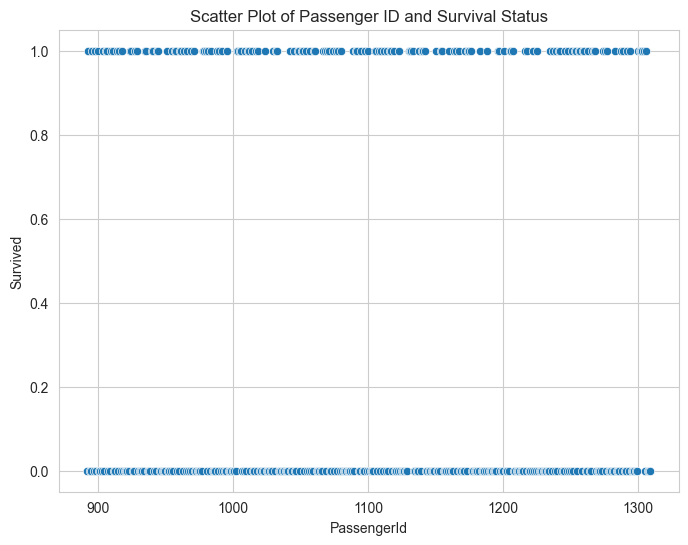

In [52]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PassengerId', y='Survived', data=df)
plt.title("Scatter Plot of Passenger ID and Survival Status")
plt.show()

### Survival status ( heatmap )

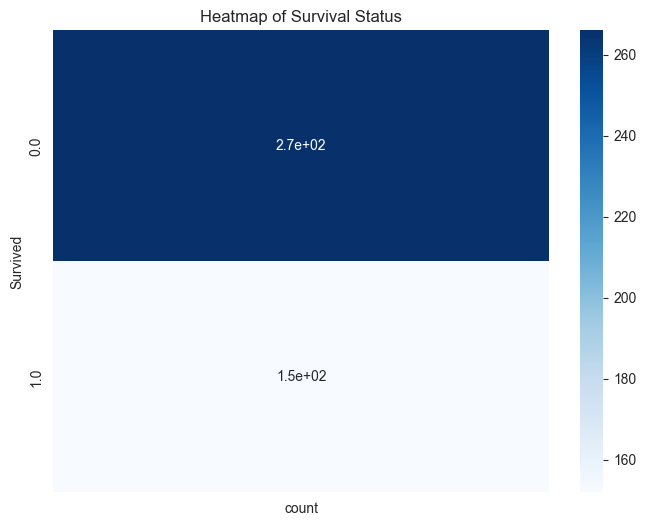

In [53]:
plt.figure(figsize=(8, 6))
sns.heatmap(df['Survived'].value_counts().to_frame(), annot=True, cmap='Blues')
plt.title("Heatmap of Survival Status")
plt.show()